In [1]:
import pandas as pd, GPy, seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [12]:
%run load_data.py micro

loading microarray data
micro_all_genes: (13613, 105)
micro_effector_genes: (1044, 105)
micro_mod_activities: (89, 105)
micro_mod_genevalues: (201, 105)
micro_mod_nodevalues: (462, 105)
micro_signaling_genes: (2184, 105)
micro_design: (105, 4)


In [13]:
Y = micro_mod_genevalues.T.copy()
Y -= Y.values.mean()
Y = Y.dropna(axis=1).values

In [14]:
m = GPy.models.BayesianGPLVM(Y, 10, num_inducing=20)

m.likelihood.fix(0.1)
m.X.variance.fix(0.1)
m.optimize(messages=1, max_iters=300)

m.X.variance.unfix()
m.optimize(messages=1, max_iters=600)

m.likelihood.unfix()
m.optimize(messages=1, max_iters=3e5)

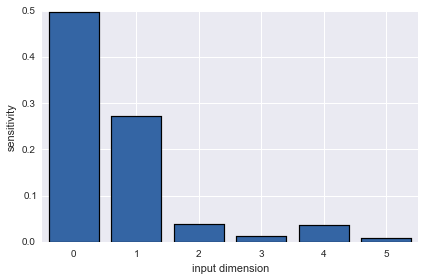

In [18]:
m.kern.plot_ARD()

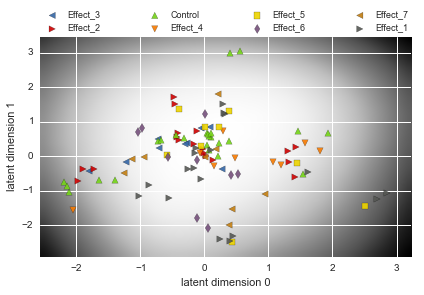

In [19]:
m.plot_magnification(labels=micro_design.Effect)

In [11]:
micro_design.head()

,idx,Drug/Chemical,Effect,Set
SampleID_Microarray,,,,
Array_1,1,Effect_3,Drug/Chemical_1,Training Set
Array_2,2,Effect_3,Drug/Chemical_1,Training Set
Array_3,3,Effect_3,Drug/Chemical_2,Training Set
Array_4,4,Effect_3,Drug/Chemical_2,Training Set
Array_5,5,Effect_3,Drug/Chemical_2,Training Set
